In [1]:
# Import necessary libraries
import numpy as np  # For numerical computations
from sklearn.ensemble import IsolationForest  # For anomaly detection
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization

In [2]:
# Load and preprocess the data
data = pd.read_excel("Pump_data.xlsx", sheet_name='Sheet1')

# Drop timestamps column (It's not needed for modeling)
data = data.drop(["timestamps"], axis=1)

In [3]:
#Check for null values in dataset
print(data.isnull().sum())

Suction Temp      108
Bearing Temp A    106
Bearing Temp B    106
Bearing Temp C    109
Bearing Vib A     105
Bearing Vib B     106
Bearing Vib C     109
Bearing Vib D     109
Current           314
dtype: int64


In [4]:

# Handle missing values with forward-fill, backward-fill, and interpolation
# Forward-fill followed by backward-fill to propagate nearest valid values
data = data.fillna(method='ffill').fillna(method='bfill')

# Perform linear interpolation as a fallback for any remaining NaNs
data = data.interpolate(method='linear', axis=0)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20268\1409566794.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill').fillna(method='bfill')


In [5]:
#Check for null values in dataset adter handling missing values
print(data.isnull().sum())

Suction Temp      0
Bearing Temp A    0
Bearing Temp B    0
Bearing Temp C    0
Bearing Vib A     0
Bearing Vib B     0
Bearing Vib C     0
Bearing Vib D     0
Current           0
dtype: int64


In [6]:

# Extract features
X = data.to_numpy()

# Train Isolation Forest
isolation_forest = IsolationForest(
    n_estimators=200,      # Number of trees in the forest
    max_samples=256,       # Subsample size
    contamination='auto',  # Automatically estimate contamination
    random_state=0         # Set random seed for reproducibility
)
isolation_forest.fit(X)

IsolationForest(max_samples=256, n_estimators=200, random_state=0)

In [7]:
# Generate raw anomaly scores (higher means normal)
raw_scores = -isolation_forest.decision_function(X)  # Invert scores to make higher = normal

# Normalize the scores to the range [0, 1]
min_score = np.min(raw_scores)
max_score = np.max(raw_scores)
normalized_scores = (raw_scores - min_score) / (max_score - min_score)

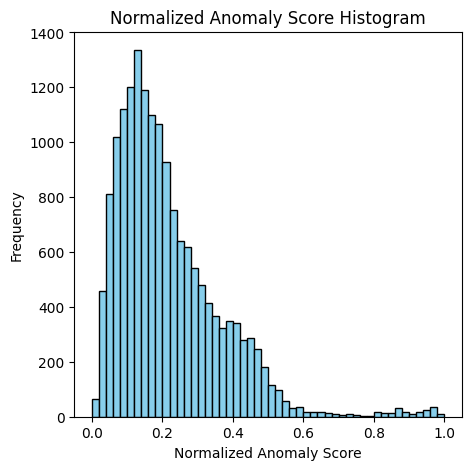

In [16]:

# Plot the normalized anomaly scores
plt.figure(figsize=(5, 5))
plt.hist(normalized_scores, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Normalized Anomaly Score')
plt.ylabel('Frequency')
plt.title('Normalized Anomaly Score Histogram')
plt.show()

In [18]:
threshold = 0.65#0.8-->193 ; 0.7-->222 ; 0.65 -->255
num_anomalies = (normalized_scores > threshold).sum()
print(f"Number of anomalies: {num_anomalies}")

Number of anomalies: 255


In [22]:
# Add the normalized scores
data['anomaly_score'] = normalized_scores

# Add a Yes/No decision based on threshold
data['anomaly_decision'] = ['Yes' if score > threshold else 'No' for score in normalized_scores]

# Save everything to Excel
data.to_excel("Pump_data_with_anomaly_scores.xlsx", index=False)


Number of anomalies: 255


In [24]:
# Find all anomalies (where the anomaly score is greater than the threshold)
anomalies = data[normalized_scores > threshold]

# Display the anomalies
print(anomalies)

       Suction Temp  Bearing Temp A  Bearing Temp B  Bearing Temp C  \
1968        127.331          78.050          81.225          71.021   
2073        139.572          72.411          75.186          71.687   
2205        139.212          52.774          54.303          60.496   
2324        133.890          80.362          82.989          67.052   
2344        137.862          81.970          84.413          68.708   
...             ...             ...             ...             ...   
16654       110.962          55.463          56.158          52.940   
16657        72.055          71.205          73.096          64.767   
16658        68.591          69.467          71.336          64.432   
16659        71.141          68.883          70.802          63.456   
16660        83.394          68.871          70.872          62.746   

       Bearing Vib A  Bearing Vib B  Bearing Vib C  Bearing Vib D  Current  \
1968          59.771         59.459         20.546         18.085    

PUMP SET DATA SET FOR REFERENCE AND PRACTICE

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# # Load and preprocess the data
# data = pd.read_excel("Pump_data.xlsx", sheet_name='Sheet1')
# data = data.drop(["timestamps"], axis=1)  # Drop timestamps column
# data = data.fillna(0)  # Handle missing values

# # Extract features
# X = data.to_numpy()

# # Custom Isolation Forest Implementation
# class Node:
#     def __init__(self, left=None, right=None, feature=None, split_value=None, data=None):
#         self.left = left
#         self.right = right
#         self.feature = feature
#         self.split_value = split_value
#         self.data = data

#     def is_leaf(self):
#         return self.left is None and self.right is None


# def build_iTree(data, height_limit):
#     if len(data) <= 1 or height_limit == 0:
#         return Node(data=data)
#     feature = np.random.choice(data.shape[1])
#     split_value = np.random.uniform(data[:, feature].min(), data[:, feature].max())
#     left_data = data[data[:, feature] < split_value]
#     right_data = data[data[:, feature] >= split_value]
#     left_tree = build_iTree(left_data, height_limit - 1)
#     right_tree = build_iTree(right_data, height_limit - 1)
#     return Node(left=left_tree, right=right_tree, feature=feature, split_value=split_value)


# def c(n):
#     if n <= 1:
#         return 0
#     harmonic_number = np.log(n - 1) + 0.5772156649 if (n - 1) > 0 else 0
#     return 2 * harmonic_number - (2 * (n - 1) / n)


# def path_length(point, tree, current_length):
#     if tree.is_leaf():
#         return current_length + c(len(tree.data))
#     if point[tree.feature] < tree.split_value:
#         return path_length(point, tree.left, current_length + 1)
#     else:
#         return path_length(point, tree.right, current_length + 1)


# def anomaly_score(point, forest):
#     path_lengths = [path_length(point, tree, 0) for tree in forest]
#     avg_path_length = np.mean(path_lengths)
#     return 2 ** (-avg_path_length / c(len(forest)))


# def build_isolation_forest(data, num_trees, subsample_size, height_limit):
#     forest = []
#     for _ in range(num_trees):
#         indices = np.random.choice(len(data), min(subsample_size, len(data)))
#         subsample = data[indices, :]
#         tree = build_iTree(subsample, height_limit)
#         forest.append(tree)
#     return forest


# # Build the Isolation Forest
# num_trees = 100
# subsample_size = 256
# height_limit = 15
# forest = build_isolation_forest(X, num_trees, subsample_size, height_limit)

# # Calculate anomaly scores
# raw_scores = np.array([-anomaly_score(point, forest) for point in X])

# # Normalize the scores
# min_score = np.min(raw_scores)
# max_score = np.max(raw_scores)
# normalized_scores = (raw_scores - min_score) / (max_score - min_score)

# # Add normalized scores to the dataframe
# data['anomaly_score'] = normalized_scores

# # Display the dataframe with anomaly scores
# print(data[['anomaly_score']])

# # Plot the normalized anomaly scores
# plt.figure(figsize=(5, 5))
# plt.hist(normalized_scores, bins=50, color='skyblue', edgecolor='black')
# plt.xlabel('Normalized Anomaly Score')
# plt.ylabel('Frequency')
# plt.title('Normalized Anomaly Score Histogram')
# plt.show()
